<h1 style="text-align:center;">Лабораторная работа №4</h1>

<h2 style="text-align:center;">Решение задачи экстраполяции различными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранную задачу перечисленными методами: 
1. Классическая полиномиальная интерполяция по Ньютону
2. Сплайн-интерполяция
3. Метод наименьших квадратов

В чем суть?

**Аппроксимация** — научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми.Простыми словами, аппроксимировать — это заменить одни результаты другими, близкими к исходным, но упрощёнными. 

**Интерполяция** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.


**Экстраполяция** - особый тип аппроксимации, при котором функция аппроксимируется вне заданного интервала, а не между заданными значениями. Иными словами, экстраполяция — приближённое определение значений функции $f(x)$ в точках $x$,
 лежащих вне отрезка $[x_{0},x_{n}]$, по её значениям в точках $x_{0}<x_{1}<...<x_{n}$.


<img src="images\image.png" alt="drawing" width="650"/>


Итак, с помощью аппроксимации мы находим функцию приближенным методом. 

С помощью интерполяции или экстраполяции находим значение нужных точек внутри таблицы или за её пределами.

<img src="images\task_lab_4.png" alt="drawing" width="650"/>

In [29]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

Запишем данные о населении CCCР за с 1920 по 1985 в массивы.
Возьмем 2 варианта - информацию о населении с периодом в 5 и 10 лет, чтобы сравнить, как влияет количество точек на качество интерполяции.
Также запишем население страны в 1991 и в 1915 году (в 1915 - еще Российской Империи), в этих точках будем проверять экстраполяцию.

Данные взяты с https://ru.wikipedia.org/wiki/Население_СССР

In [30]:
years_5 =      [1920,      1925,      1930,      1935,      1940,      1945,      1950,      1955,      1960,       1965,      1970,      1975,      1980,       1985]      #годы
population_5 = [137727000, 143003000, 157432000, 158167000, 192598000, 170548000, 179229000, 194400000, 212400000,  229600000, 241700000, 253300000, 264500000,  276300000] #население

years_10 =      [1920,      1930,      1940,       1950,      1960,      1970,      1980]      #годы
population_10 = [137727000, 157432000, 192598000,  179229000, 212400000, 241700000, 264500000] #население


years_small =      [ 1950,      1960,      1970,      1980]      #годы
population_small = [ 179229000, 212400000, 241700000, 264500000] #население

#Данные для проверки экстраполяции
x_true = [1915,      1991]
y_true = [159200000, 294008571]


#### **1) Классическая полиномиальная интерполяция по Ньютону.**

<img src="images\sep_diff_.png" alt="drawing" width="580"/>
<img src="images\sep_diff.png" alt="drawing" width="650"/>

Сначала посчитаем разделенные разности для данных и используем эту функцию в основной.

In [31]:
# функция вычисляет разделенные разности
def sep_diff(x, y):
    n = len(x) #количество данных
    dif = np.zeros([n, n])
    
    for i in range(n):
        dif[i, 0] = y[i]  # Первая колонка - значения y
    
    for j in range(1, n): #столбцы все кроме 0го
        for i in range(n - j): # строки - от 0 по n-j-1
            dif[i][j] = (dif[i + 1][j - 1] - dif[i][j - 1]) / (x[i + j] - x[i])
    
    return dif[0, :]  # Возвращаем первую строку (коэффициенты)


In [32]:
def Newton(x, coef, x_val):
    # x_val - точка для расчета интерполяционного многочлена
    n = len(coef)
    result = coef[0]  # Начальное значение - первый коэффициент
    product = 1       # Для накопления произведения
    
    for i in range(1, n):
        product *= (x_val - x[i - 1])  # Произведение (x_val - x[j]) от j=0 до i-1
        result += coef[i] * product   # Добавляем текущее слагаемое
    
    return result

In [33]:
# Вычисление коэффициентов
coeffs_10 =    sep_diff(years_10, population_10)
coeffs_5 =     sep_diff(years_5, population_5)
coeffs_small = sep_diff(years_small, population_small)

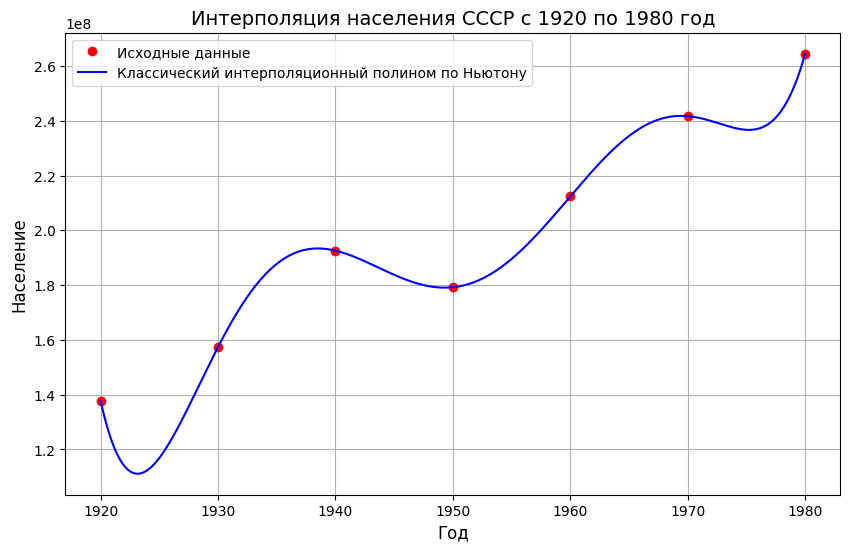

In [34]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1920, 1980, 300)
y_dense = [Newton(years_10, coeffs_10, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_10, population_10, 'o', label='Исходные данные', color='red')
#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

plt.title('Интерполяция населения СССР с 1920 по 1980 год', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Итак, интерполяция производится отлично, на гладкость кривой мы можем влиять третьим параметром в строчке x_dense = np.linspace(1920, 1980, 100) - чем он больше, тем в большем количестве точек мы посчитаем значение полинома и тем более гладкая кривая получится.

Посмотрим на возможности метода в экстраполяции.


In [35]:

extrapolate_10 = []
for l in range(len(x_true)):
    year = x_true[l]
    newton = Newton(years_10, coeffs_10, year)
    extrapolate_10.append(newton)
    print(f"Оценка населения в {year} году:    {newton:.0f}")
    print(f"Реальное  население в {year} году: {y_true[l]:.0f}")

Оценка населения в 1915 году:    384418995
Реальное  население в 1915 году: 159200000
Оценка населения в 1991 году:    1210090219
Реальное  население в 1991 году: 294008571


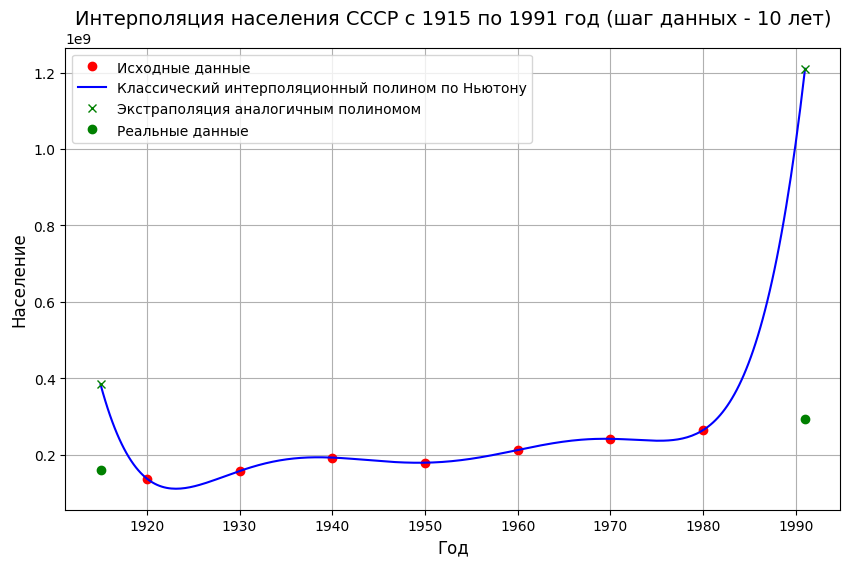

In [36]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1915, 1991, 300) # чем больше здесь точек, тем более гладкая прямая
y_dense = [Newton(years_10, coeffs_10, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_10, population_10, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot(x_true, extrapolate_10, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='green')


plt.title('Интерполяция населения СССР с 1915 по 1991 год (шаг данных - 10 лет)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Посмотрим, как повлияет на качество экстраполяции увеличение числа точек в 2 раза. 

In [37]:

extrapolate_5 = []
for l in range(len(x_true)):
    year = x_true[l]
    newton = Newton(years_5, coeffs_5, year)
    extrapolate_5.append(newton)
    print(f"Оценка населения в {year} году:    {newton:.0f}")
    print(f"Реальное  население в {year} году: {y_true[l]:.0f}")


Оценка населения в 1915 году:    56401666000
Реальное  население в 1915 году: 159200000
Оценка населения в 1991 году:    -46692914850
Реальное  население в 1991 году: 294008571


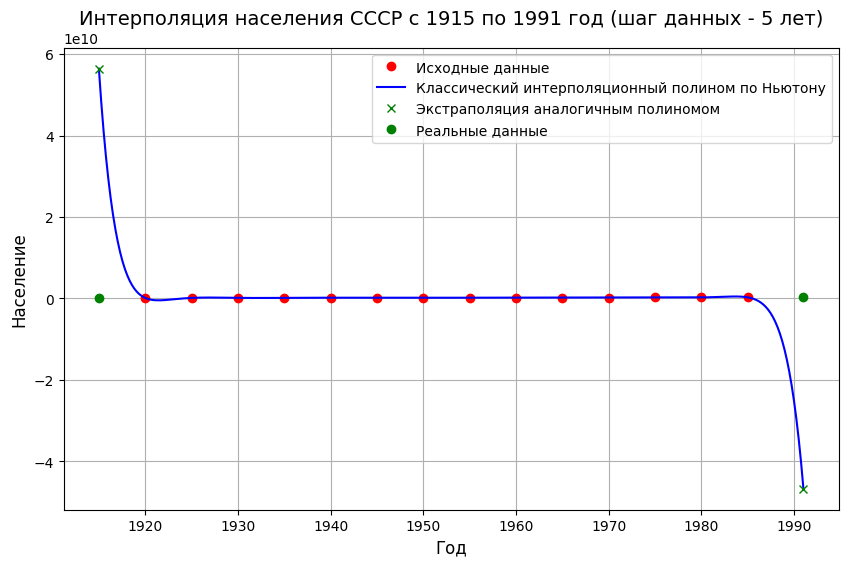

In [38]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1915, 1991, 300) # чем больше здесь точек, тем более гладкая прямая
y_dense = [Newton(years_5, coeffs_5, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_5, population_5, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot(x_true, extrapolate_5, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='green')


plt.title('Интерполяция населения СССР с 1915 по 1991 год (шаг данных - 5 лет)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Как можем видеть, этот метод для экстраполяции не подходит! Причем при увеличении количества точек все становится только хуже.

Интерполяция Ньютона строит полином степени $𝑛−1$ для $𝑛$ точек. Полиномы высокой степени имеют тенденцию к чрезмерным осцилляциям (эффект Рунге), особенно за пределами диапазона данных. На графике видно, что это приводит к экспоненциальному росту предсказаний как слева, так и справа. Также при экстраполяции добавляются большие члены, зависящие от разностей между экстремальными значениями $x$ и точкой экстраполяции $𝑥𝑣𝑎𝑙$.

Феномен Рунге — в численном анализе эффект нежелательных осцилляций (колебаний), возникающий при интерполяции полиномами высоких степеней. Был открыт Карлом Рунге при изучении ошибок полиномиальной интерполяции для приближения некоторых функций.

Добавление новых точек для полиномиальной интерполяции в методе Ньютона или любом другом аналогичном подходе (например, интерполяция Лагранжа) усугубляет эффект Рунге, особенно при высоких степенях полинома.

<img src="images\runge.png" alt="drawing" width="600"/>

Как уменьшить этот негативный эффект?
1) уменьшить диапазон данных 
2) добавить больше точек на краях диапазона
3) нормализовать данные на меньший диапазон, например, $[0, 1]$

Попробуем 1й пункт - оставим данные с 1950 по 1980 годы, 4 точки



In [39]:
extrapolate_small = []
year = 1975
newton = Newton(years_small, coeffs_small, year)
extrapolate_small.append(newton)
print(f"Оценка населения в {year} году:    {newton:.0f}")
print(f"Реальное  население в {year} году: {y_true[l]:.0f}")

newton1975 = 254076812

Оценка населения в 1975 году:    254076812
Реальное  население в 1975 году: 294008571


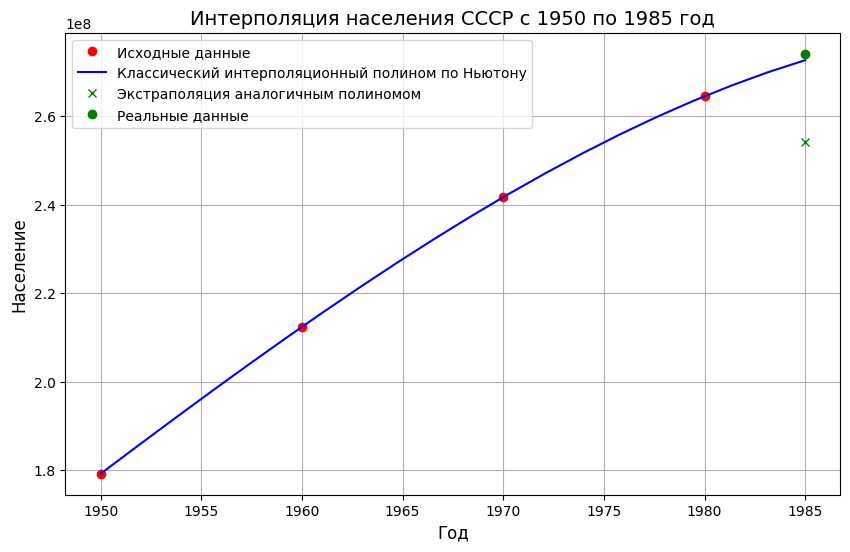

In [40]:
# Создание плотных точек для построения графика
x_dense = np.linspace(1950, 1985, 20) # чем больше здесь точек, тем более гладкая прямая
y_dense = [Newton(years_small, coeffs_small, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(10, 6))

#исходные данные - заданные для интерполяции точки
plt.plot(years_small, population_small, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точек 1915 и 1991
plt.plot([1985], extrapolate_small, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot([1985], [274100000], 'o', label='Реальные данные', color='green')


plt.title('Интерполяция населения СССР с 1950 по 1985 год', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()


Как видим, теперь экстраполяция дает уже очень близкие к реальным значения!

####  **2) Сплайн-интерполяция.**

Сначала посмотрим на работу встроенной функции кубического сплайна.

In [41]:
#Используем метод Гаусса для решения СЛАУ из прошлой лабы!
def norm3_vect(vect):
    return pow(sum(el**2 for el in vect), 0.5)

def matr_multipl(A, B):
    
    if A.shape[1] != B.shape[0]: return 
    AB = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                AB[i][j] += A[i][k] * B[k][j]
    
    return AB

def swap_rows(A, row1, row2): #функция для смены строк в матрице
    A[[row1, row2]] = A[[row2, row1]]

def swap_columns(A, col1, col2): #функция для смены столбцов в матрице
    A[:, [col1, col2]] = A[:, [col2, col1]]

def find_max_el(A, iter): #функция для поиска главного элемента матрицы A[iter,iter]
    size = len(A) - iter
    main_element = A[iter,iter]
    i_main, j_main = iter, iter

    for i in range(iter, size): 
        for j in range(iter, size):
            if abs(A[iter:, iter:][i][j]) > abs(main_element):
                i_main, j_main = i, j
                main_element = A[iter:, iter:][i][j]
    return main_element, i_main, j_main

def gauss(A, f):
    size = len(A)
    if A.shape[0] != A.shape[1]:
        print("Матрица не квадратная, решение невозможно!")
        return 
    x = np.arange(size) #массив с порядком корней (порядок будет меняться при перестановке столбцов)

    #прямой ход алгоритма - приводим матрицу A к верхнетреугольному виду
    for iter in range(len(A)):
        ''' Добавим в алгоритм проверку - если на какой-то итерации алгоритма возникла нулевая строка - ответ будет выражаться 
        через одну из переменных (её берем за константу, все остальные переменные будут выражены через нее)'''
        if (len(A) != sum(int(np.any(el)) for el in A)):
            '''Количество переменных превышает количество уравнений, решение не однозначн'''
            print("ERROR! Матрица не квадратная, решение невозможно!")
            return 
        
        main_el, i_main, j_main = find_max_el(A, iter) #максимальный элемент текущей матрицы и его местонахождение
        
        if (i_main != iter): #если элемент еще не в нулевой строке
            swap_rows(A, iter, i_main) #меняем в текущей матрице нулевую строку и строку, содержащую главный элемент            
            swap_rows(f, iter, i_main) #то же самое - в столбце решений       
            
        if (j_main != iter): #если элемент еще не в нулевом столбце
            swap_columns(A, iter, j_main) #меняем в текущей матрице нулевой столбец и столбец, содержащий главный элемент
            #swap_columns(x, iter, j_main) #то же самое - в строке порядка переменных
            x[iter], x[j_main] = x[j_main], x[iter]
        
        if main_el != 0:
            A[iter:, iter:][0] /= main_el #делим нулевую строку текущей матрицы на главный элемент
            f[iter] /= main_el #делим нулевую строку текущего столбца решений на главный элемент
        else:
            print("ERROR! main_el = 0")
            return
    
        for i in range(size - iter - 1):   
            f[i+iter+1] -= (f[iter] * A[iter:, iter:][i+1][0])
            #вычитаем из каждого элемента нулевой в текущем столбце решений, умноженный на нулевой элемент нужной строки - получаем в начале каждой строки единицу
            A[iter:, iter:][i+1] -=  (A[iter:, iter:][0] * A[iter:, iter:][i+1][0])
            #вычитаем из каждой строки нулевую, умноженную на нулевой элемент нужной строки - получаем в начале каждой строки единицу
        
    f[-1] /= A[-1][-1]
    A[size-1][size-1] = 1


    
    #обратный ход алгоритма
    U  = np.zeros((size, 1)) #столбец решений
    for i in range(size-1, -1, -1):
        U[i] = f[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    #перестановка переменных в изначальном порядке
    ans = np.zeros((size, 1))
    for i in range(size):
        ans[int(x[i])] = U[i]
    
    return ans

Убедившись в успешной работе встроенного сплайна, напишем свой.
Основная идея заключается в нахождении коэффициентов кусочно-кубических полиномов для каждого интервала между соседними узлами.

Кубический сплайн гарантирует, что функция и её первые две производные будут непрерывны на всём интерполируемом интервале.

Формулировка полинома: для каждого интервала $[x_i, x_(i+1)]$ кубический полином задается как $S_i(x) = a_i +b_i(x−x_i) + c_i(x−x_i)^2 + d_i(x−x_i)^3$.

Найдем коэффиценты $a_i$, $b_i$, $c_i$, $d_i$


In [42]:
# функция для вычисления кубического сплайна
def cubic_spline(x, y):
    
    n = len(x) - 1  # количество интервалов
    h = np.diff(x)  # длины интервалов

    # Вычисляем вектор правой части системы уравнений (f)
    f = np.zeros(n + 1)
    for i in range(1, n):
        f[i] = (3 / h[i] * (y[i + 1] - y[i]) - 3 / h[i - 1] * (y[i] - y[i - 1]))

    # Формируем матрицу A для решения системы уравнений
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    for i in range(1, n):
        A[i, i - 1] = h[i - 1]  # нижняя диагональ
        A[i, i] = 2 * (h[i - 1] + h[i])  # главная диагональ
        A[i, i + 1] = h[i]  # верхняя диагональ
        b[i] = f[i]

    # Граничные условия
    A[0, 0] = 1
    A[n, n] = 1
  
    # Решаем систему линейных уравнений для коэффициентов c
    c = gauss(A, b)

    # Вычисляем коэффициенты a, b, d
    a = y[:-1]
    b = np.zeros(n)
    d = np.zeros(n)

    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (2 * c[i][0] + c[i + 1][0]) / 3
        d[i] = (c[i + 1][0] - c[i][0]) / (3 * h[i])

    return a, b, c[:-1], d


In [43]:
# Вычисление значения сплайна в точке xi.
def value_spline(x, a, b, c, d, xi):
    n = len(a)
    for i in range(n):
        if x[i] <= xi <= x[i + 1]:
            dx = xi - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    raise ValueError("xi вне диапазона x")

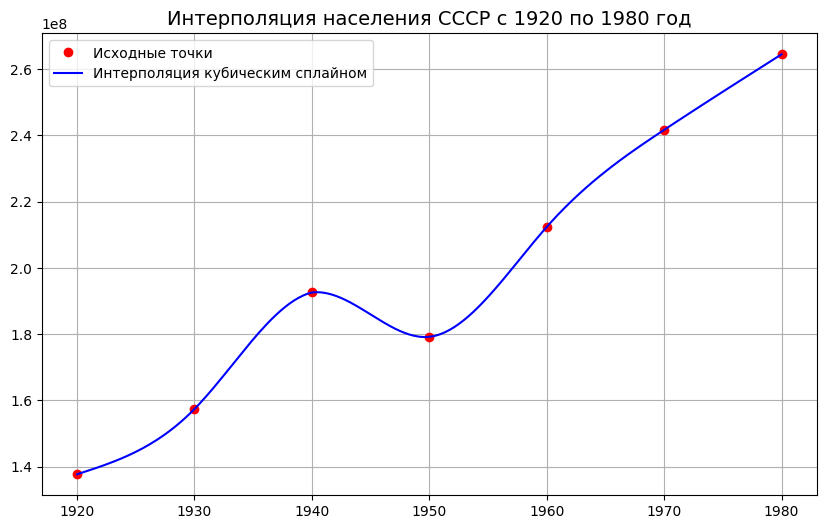

In [44]:
# Строим сплайн
a, b, c, d = cubic_spline(years_10, population_10)

# Оцениваем значение сплайна
x_dense = np.linspace(1920, 1980, 300)
y_dense = [value_spline(years_10, a, b, c, d, xi) for xi in x_dense]



plt.figure(figsize=(10, 6))
plt.plot(years_10, population_10, 'o', label="Исходные точки", color = "red")
plt.plot(x_dense, y_dense, label="Интерполяция кубическим сплайном", color = "blue")

plt.legend()
plt.grid(True)
plt.title('Интерполяция населения СССР с 1920 по 1980 год', fontsize=14)
plt.show()


Теперь попробуем экстраполировать на 1915 и 1991 года построенным сплайном.
Для этого придется изменить функцию, вычисляющую значение сплайна в точке: сплайн в принципе плохо подходит для экстраполяции, т к на краях не гарантирует гладкость. Мы будем проверять гладкость, просто смотря на производную на краях диапазона.

In [45]:
# Вычисление значения сплайна в точке xi с поддержкой экстраполяции.
def value_spline_extrapolate(x, a, b, c, d, xi):
    
    n = len(a)
    if xi < x[0]:  # Экстраполяция слева
        dx = xi - x[0]
        return a[0] + b[0] * dx + c[0] * dx**2 + d[0] * dx**3
    elif xi > x[-1]:  # Экстраполяция справа
        dx = xi - x[-1]
        return a[-1] + b[-1] * dx + c[-1] * dx**2 + d[-1] * dx**3
    else:  # Интерполяция внутри диапазона
        for i in range(n):
            if x[i] <= xi <= x[i + 1]:
                dx = xi - x[i]
                return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    raise ValueError("Ошибка вычисления: xi вне диапазона x")


Оценка населения в 1915 году: 130957415
Реальное  население в 1915 году: 159200000
Оценка населения в 1991 году: 266748085
Реальное  население в 1991 году: 294008571


<Figure size 1000x600 with 0 Axes>

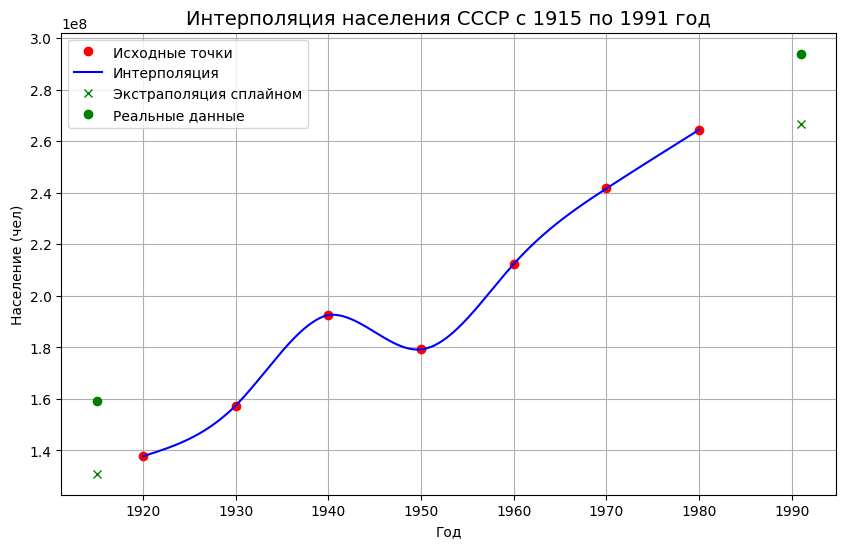

In [46]:
# Точки для экстраполяции
extrapolation_points = [1915, 1991]

# Вычисление значений сплайна в точках
extrapolated_values = [value_spline_extrapolate(years_10, a, b, c, d, xi) for xi in extrapolation_points]


for i in range(len(x_true)):
    print(f"Оценка населения в {x_true[i]} году:", int(extrapolated_values[i].item()))
    print(f"Реальное  население в {x_true[i]} году: {y_true[i]:.0f}")

spline1975 = value_spline_extrapolate(years_10, a, b, c, d, 1975)
spline1991 = 266748085


plt.figure(figsize=(10, 6))

# Объединяем диапазон x для интерполяции и экстраполяции
x_combined = np.linspace(1920, 1980, 300) 
y_combined = [value_spline(years_10, a, b, c, d, xi) for xi in x_combined]


plt.figure(figsize=(10, 6))

plt.plot(years_10, population_10, 'o', label="Исходные точки", color = "red")
plt.plot(x_combined, y_combined, '-', color='blue', label="Интерполяция")

plt.plot(x_true, extrapolated_values, 'x', label='Экстраполяция сплайном', color='green')
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='green')

plt.legend()
plt.xlabel("Год")
plt.ylabel("Население (чел)")
plt.grid(True)
plt.title('Интерполяция населения СССР с 1915 по 1991 год', fontsize=14)
plt.show()


#### **3) Метод наименьших квадратов.**

МНК - метод аппроксимации, а не интерполяции, поэтому в данном случае полученная кривая не обязана проходить через все отсчеты (хотя и может это делать), она просто проходит так, чтобы расстояния (ошибки) до всех отсчетов были минимальными.

In [47]:
def MNC(polynomial_degree, centered_years, years_10):
    
    centered_years = years_10 - np.mean(years_10)
    # Инициализация матрицы для системы линейных уравнений и вектора правой части
    matrix_A = np.zeros((polynomial_degree + 1, polynomial_degree + 1))
    vector_b = np.zeros((polynomial_degree + 1, 1))

    # Заполнение матрицы A и вектора b
    for i in range(polynomial_degree + 1):
        for j in range(polynomial_degree + 1):
            matrix_A[i, j] = np.sum(centered_years ** (i + j))  # Заполнение элементов матрицы A
        vector_b[i, 0] = np.sum(population_10 * (centered_years ** i))  # Заполнение элементов вектора b

    # Решение системы линейных уравнений для нахождения коэффициентов полинома
    return gauss(matrix_A, vector_b)


In [48]:
# Функция для вычисления значения полинома в точке x
def evaluate_polynomial(x, coefficients):
    return sum(coef * (x ** power) for power, coef in enumerate(coefficients))

In [49]:
# Центрирование данных (вычитание среднего значения)
centered_years = years_10 - np.mean(years_10)
# Степень полинома
polynomial_degree = 3

polynomial_coefficients = MNC(3, centered_years, years_10)

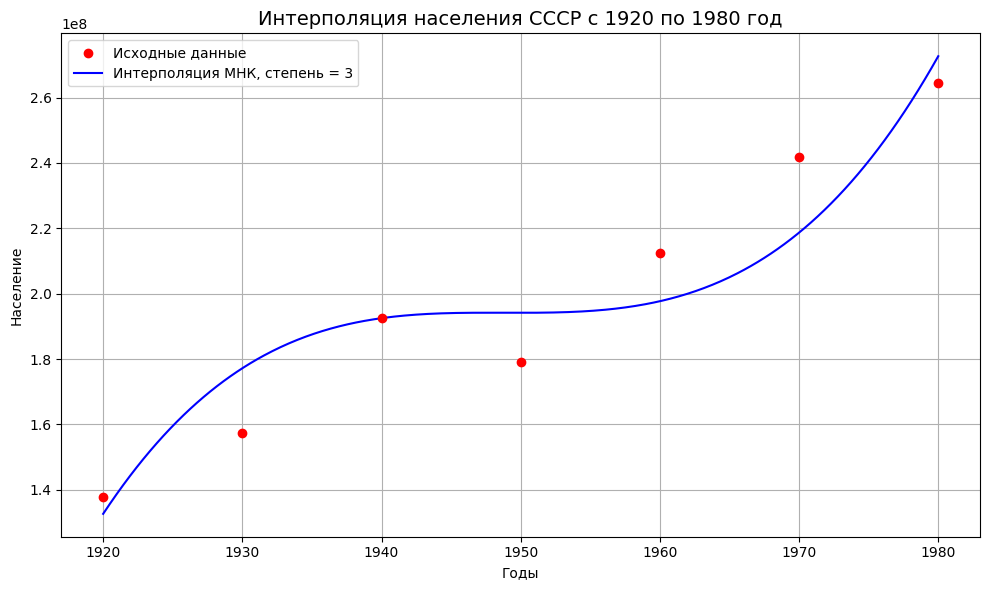

In [50]:
# Генерация точек для построения графика
x_values_for_plot = np.linspace(min(centered_years), max(centered_years), 500)

# Вычисление значений полинома для новых точек
y_values_for_plot = evaluate_polynomial(x_values_for_plot, polynomial_coefficients)

x_vals = np.linspace(min(centered_years), max(centered_years), 500)
y_vals = evaluate_polynomial(x_vals, polynomial_coefficients)

x_original = x_vals + np.mean(years_10) # Добавляем среднее арифметическое обратно, чтобы на графике данные были в изначальном масштабе

plt.figure(figsize=(10, 6))
plt.scatter(years_10, population_10, color='red', label='Исходные данные', zorder=3)
plt.plot(x_original, y_vals, color='blue', label='Интерполяция МНК, степень = 3')
plt.xlabel('Годы')
plt.ylabel('Население')
plt.legend()
plt.grid()
plt.title('Интерполяция населения СССР с 1920 по 1980 год', fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
mnc1975 = 240430000

Получили аппроксимацию. Однако: если повысить степень полинома, получим интерполяцию!
Почему?
При высокой степени полинома МНК приближается к многочлену Лагранжа (или Ньютона), который выполняет интерполяцию, а не аппроксимацию - см пункт 1.

Когда степень полинома равна или больше количества точек данных минус один (например, для 7 точек данных степень 6 и выше), у полинома становится достаточно степеней свободы, чтобы он точно проходил через все точки.
Получается, многочлен высокой степени может быть построен так, чтобы его значения совпадали с исходными данными в каждой точке.

In [52]:
degree = 10
polynomial_coefficients = MNC(degree, centered_years, years_10)

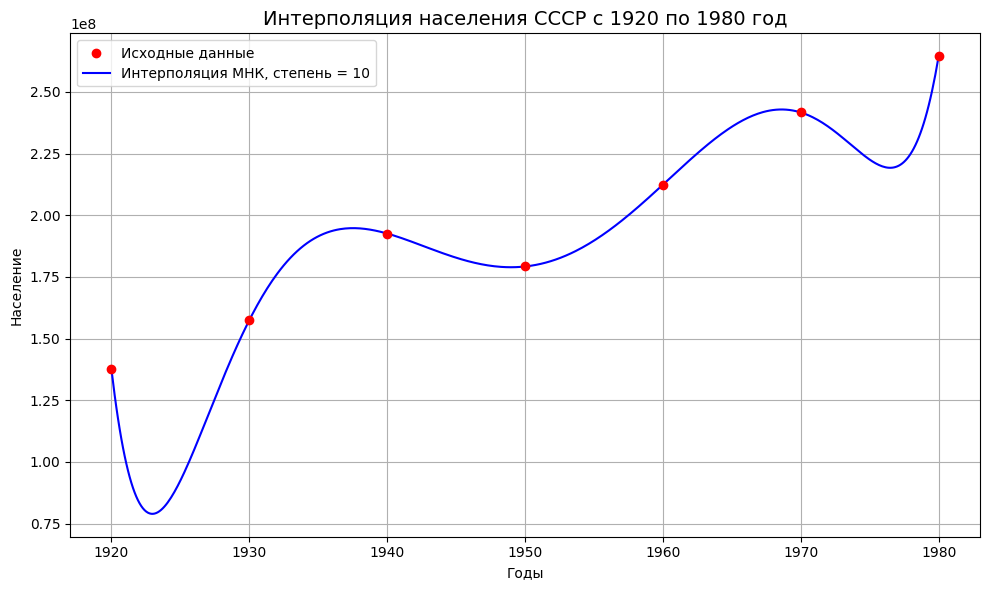

In [53]:
# Генерация точек для построения графика
x_values_for_plot = np.linspace(min(centered_years), max(centered_years), 500)

# Вычисление значений полинома для новых точек
y_values_for_plot = evaluate_polynomial(x_values_for_plot, polynomial_coefficients)

x_vals = np.linspace(min(centered_years), max(centered_years), 500)
y_vals = evaluate_polynomial(x_vals, polynomial_coefficients)

x_original = x_vals + np.mean(years_10) # Добавляем среднее арифметическое обратно, чтобы на графике данные были в изначальном масштабе

plt.figure(figsize=(10, 6))
plt.scatter(years_10, population_10, color='red', label='Исходные данные', zorder=3)
plt.plot(x_original, y_vals, color='blue', label='Интерполяция МНК, степень = 10')
plt.xlabel('Годы')
plt.ylabel('Население')
plt.legend()
plt.grid()
plt.title('Интерполяция населения СССР с 1920 по 1980 год', fontsize=14)
plt.tight_layout()
plt.show()

Хотя на первый взгляд кажется, что это хорошо (кривая идеально проходит через точки), на практике это может привести к нежелательным эффектам:

1) Осцилляции Рунге - ее обсудили в п 1, полином высокой степени может сильно колебаться между точками данных, особенно на концах интервала. 
2) Плохая обобщающая способность: полином "запоминает" данные, но плохо предсказывает значения между точками и за их пределами.
3) Численная нестабильность: при решении СЛАУ для коэффициентов полиномов высокой степени могут возникать большие ошибки из-за численной нестабильности.
Теперь посмотрим на возможности экстраполяции МНК.

In [54]:
# Функция для нахождения коэффициентов полинома методом МНК
def MNC_extra(polynomial_degree, years, population_data):
    centered_years = years - np.mean(years)
    matrix_A = np.zeros((polynomial_degree + 1, polynomial_degree + 1))
    vector_b = np.zeros((polynomial_degree + 1, 1))

    for i in range(polynomial_degree + 1):
        for j in range(polynomial_degree + 1):
            matrix_A[i, j] = np.sum(centered_years ** (i + j))
        vector_b[i, 0] = np.sum(population_data * (centered_years ** i))

    return np.linalg.solve(matrix_A, vector_b), centered_years

Коэффициенты полинома: [1.94168238e+08 1.58947063e+06 9.43154762e+03 6.30638889e+02]


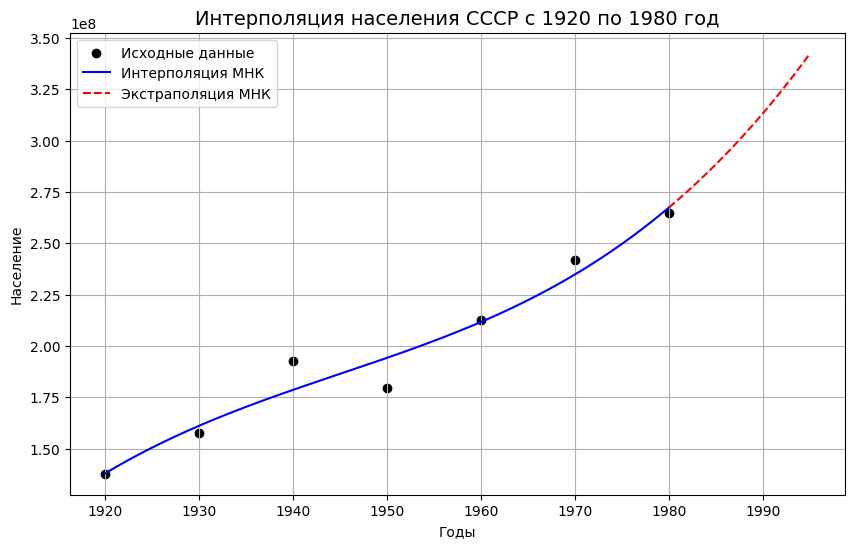

In [55]:
# Степень полинома
degree = 3
# Получаем коэффициенты и центрированные данные
coefficients, centered_years = MNC_extra(degree, years_10, population_10)

# Печатаем коэффициенты для проверки
print("Коэффициенты полинома:", coefficients.flatten())

# Генерация точек для интерполяции и экстраполяции
x_interpolation = np.linspace(min(centered_years), max(centered_years), 500)
x_extrapolation = np.linspace(max(centered_years), max(centered_years) + 15, 100)

# Вычисляем значения полинома
y_interpolation = [evaluate_polynomial(x, coefficients) for x in x_interpolation]
y_extrapolation = [evaluate_polynomial(x, coefficients) for x in x_extrapolation]

#вытащим значение в 1991
mnc1991 = evaluate_polynomial(max(centered_years) + 11, coefficients)



# Восстанавливаем исходный масштаб годов
x_interpolation_real = x_interpolation + np.mean(years_10)
x_extrapolation_real = x_extrapolation + np.mean(years_10)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(years_10, population_10, color='black', label='Исходные данные')  # Исходные точки
plt.plot(x_interpolation_real, y_interpolation, color='blue', label='Интерполяция МНК')  # Интерполяция
plt.plot(x_extrapolation_real, y_extrapolation, color='red', linestyle='--', label='Экстраполяция МНК')  # Экстраполяция

# Оформление графика
plt.xlabel('Годы')
plt.ylabel('Население')
plt.title('Интерполяция населения СССР с 1920 по 1980 год', fontsize=14)
plt.legend()
plt.grid()
plt.show()


На примере точек 1991 и 1975 посмотрим, какой метод - МНК или сплайн - в этой точке ближе рассчитывают значение через экстраполяцию:

In [56]:

print("Сплайн  1991", int(spline1991))
print("МНК     1991", int(mnc1991.item()))
print("Реально 1991", 294008571)

print()
print("Ньютон  1975", int(newton1975))
print("Сплайн  1975", int(spline1975.item()))
print("МНК     1975", int(mnc1975))
print("Реально 1975", 253300000)




Сплайн  1991 266748085
МНК     1991 318655228
Реально 1991 294008571

Ньютон  1975 254076812
Сплайн  1975 253220887
МНК     1975 240430000
Реально 1975 253300000


Сплайн оказался ближе! Хотя теоретически МНК для экстраполяции подходит лучше.

***Подведем итоги.***

1. **Классическая интерполяция по Ньютону (или Лагранжа)**
- *Суть*:  Полином высокой степени строится так, чтобы проходить точно через все точки данных.
- +:  Точно интерполирует внутри диапазона данных.
- -:  При экстраполяции (вне диапазона данных) полиномы высокой степени ведут себя нестабильно. Могут возникнуть сильные колебания (эффект Рунге), что приводит к большим ошибкам. Полиномы чувствительны к добавлению новых точек — модель сильно меняется.
- *Вывод*:  Интерполяция по Ньютону не подходит для экстраполяции, особенно при большом количестве точек.

2. **Кубический сплайн**
- *Суть*: Кубические сплайны строят гладкие кусочно-полиномиальные функции, которые проходят через точки данных. Каждый интервал описывается своим кубическим полиномом.
- +: Сплайны хорошо аппроксимируют данные внутри диапазона. Они гладкие и устойчивые к эффекту Рунге.
- -: Сплайны непредсказуемы за пределами диапазона данных, так как они не имеют глобальной структуры. Вне диапазона последний интервал "продлевается" без какой-либо логики, что может дать неверные результаты.
- *Вывод*: Кубические сплайны не подходят для экстраполяции, так как их поведение за пределами данных непредсказуемо.

3. **Метод наименьших квадратов (МНК)**
- *Суть*: МНК подбирает полином (или другую функцию) так, чтобы минимизировать сумму квадратов отклонений между моделью и данными.
- +: Позволяет строить модели низкой степени (например, полиномы 1-3 степени), которые могут хорошо экстраполировать данные, если данные имеют тренд.
Более устойчив к шуму и выбросам по сравнению с интерполяцией.
Модель глобальная и её поведение можно предсказать за пределами данных.
- -: Если выбрать слишком высокую степень полинома, можно получить переобучение и нестабильное поведение при экстраполяции.
- *Вывод*: МНК лучше всего подходит для экстраполяции, особенно если данные имеют тренд (линейный или квадратичный). Главное — выбрать не слишком высокую степень полинома.
